In [31]:
import pandas as pd

df_house = pd.read_csv('./최종_서울시_빈집_현황.csv')
df_noise = pd.read_csv('./최종_소음진동민원_전처리.csv')
df_air = pd.read_csv('./최종_대기환경정보.csv')
df_pollution = pd.read_csv('./최종_환경오염물질_배출시설.csv')

### 데이터

In [9]:
unique_values_df = df_house['gu'].drop_duplicates()
unique_values_df

0      종로구
1       중구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: gu, dtype: object

In [15]:
unique_values_df = df_air['gu'].drop_duplicates()
unique_values_df

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: gu, dtype: object

### 통계

In [27]:
# Filter rows where NoiseType is '소계'
df_filtered = df_noise[df_noise['NoiseType'] == '소계']

# Rename columns to match the desired format
df_renamed = df_filtered.rename(columns={'Year': 'year', 'Gu': 'gu', 'Count': '소음_소계'})

# Drop the 'NoiseType' column as it is no longer needed
df_final = df_renamed.drop(columns=['NoiseType'])

# import ace_tools as tools; tools.display_dataframe_to_user(name="재구조화된 데이터프레임", dataframe=df_final)

# Display the first few rows of the final dataframe
df_final.head()


,year,gu,소음_소계
0,2020,종로구,2016
1,2020,중구,1060
2,2020,용산구,1625
3,2020,성동구,1860
4,2020,광진구,1943


In [30]:
df_final.to_csv('./전체_연도별_구별_소음_데이터.csv', encoding='utf-8-sig', index=False)

In [82]:
# 연도별 구별 통계 계산 함수 정의
def calculate_annual_statistics(df, type_column, gu_column, value_column):
    
    statistics = df.groupby([gu_column, type_column])[value_column].agg(['sum']).reset_index()

    return statistics

# 연도별 구별 통계를 계산
annual_statistics_filtered_df = calculate_annual_statistics(df_noise, 'NoiseType', 'Gu', 'Count')

# 피벗 테이블을 사용하여 열 별로 변환
pivot_df = annual_statistics_filtered_df.pivot_table(index='Gu', columns='NoiseType', values=['sum'])

# 열 이름 변경
pivot_df.columns = [f'{stat}_{noise_type}' for stat, noise_type in pivot_df.columns]

# 결과 확인
pivot_df.reset_index(inplace=True)
pivot_df

,Gu,sum_공장,sum_교통,sum_생활,sum_소계
0,강남구,0.0,0.0,27772.0,27772.0
1,강동구,0.0,35.0,11897.0,11932.0
2,강북구,0.0,24.0,7738.0,7762.0
3,강서구,0.0,54.0,6038.0,6092.0
4,관악구,0.0,17.0,9696.0,9713.0
5,광진구,0.0,1.0,5729.0,5730.0
6,구로구,0.0,152.0,5531.0,5683.0
7,금천구,76.0,42.0,5738.0,5856.0
8,노원구,0.0,0.0,3243.0,3243.0
9,도봉구,45.0,40.0,3879.0,3964.0


In [83]:
pivot_df.to_csv("./전체_서울시_최종_소음진동민원.csv", encoding='utf-8-sig', index=False)

In [16]:
df_noise

,Year,Gu,NoiseType,Count
0,2020,종로구,소계,2016
1,2020,중구,소계,1060
2,2020,용산구,소계,1625
3,2020,성동구,소계,1860
4,2020,광진구,소계,1943
...,...,...,...,...
295,2022,관악구,생활,3525
296,2022,서초구,생활,5252
297,2022,강남구,생활,9883
298,2022,송파구,생활,3282


In [6]:
df_pollution

,Year,Gu,Noise_Type,Count
0,2020,종로구,대기(가스·먼지·매연및악취) 소계,111
1,2020,중구,대기(가스·먼지·매연및악취) 소계,197
2,2020,용산구,대기(가스·먼지·매연및악취) 소계,41
3,2020,성동구,대기(가스·먼지·매연및악취) 소계,215
4,2020,광진구,대기(가스·먼지·매연및악취) 소계,35
...,...,...,...,...
895,2022,관악구,수질(폐수) 5종,44
896,2022,서초구,수질(폐수) 5종,146
897,2022,강남구,수질(폐수) 5종,166
898,2022,송파구,수질(폐수) 5종,153


In [37]:
df =  df_pollution[df_pollution['Gu'] == '강남구']
df

,Year,Gu,Noise_Type,Count
22,2020,강남구,대기(가스·먼지·매연및악취) 소계,186
47,2020,강남구,대기(가스·먼지·매연및악취) 1종,4
72,2020,강남구,대기(가스·먼지·매연및악취) 2종,1
97,2020,강남구,대기(가스·먼지·매연및악취) 3종,2
122,2020,강남구,대기(가스·먼지·매연및악취) 4종,57
147,2020,강남구,대기(가스·먼지·매연및악취) 5종,122
172,2020,강남구,수질(폐수) 소계,182
197,2020,강남구,수질(폐수) 1종,0
222,2020,강남구,수질(폐수) 2종,2
247,2020,강남구,수질(폐수) 3종,6


In [96]:
# 구별 타입별 통계 계산 함수 정의
def calculate_annual_statistics(df, type_column, gu_column, value_column):

    statistics = df.groupby([gu_column, type_column])[value_column].agg(['sum']).reset_index()

    return statistics

# 구별 타입별 통계를 계산
annual_statistics_filtered_df = calculate_annual_statistics(df_pollution, 'Noise_Type', 'Gu', 'Count')

# 피벗 테이블을 사용하여 열 별로 변환
pivot_df = annual_statistics_filtered_df.pivot_table(index='Gu', columns='Noise_Type', values=['sum'])

# 열 이름 변경
pivot_df.columns = [f'{stat}_{pollution_type}' for stat, pollution_type in pivot_df.columns]

# 결과 확인
pivot_df.reset_index(inplace=True)
pivot_df

,Gu,sum_대기(가스·먼지·매연및악취) 1종,sum_대기(가스·먼지·매연및악취) 2종,sum_대기(가스·먼지·매연및악취) 3종,sum_대기(가스·먼지·매연및악취) 4종,sum_대기(가스·먼지·매연및악취) 5종,sum_대기(가스·먼지·매연및악취) 소계,sum_수질(폐수) 1종,sum_수질(폐수) 2종,sum_수질(폐수) 3종,sum_수질(폐수) 4종,sum_수질(폐수) 5종,sum_수질(폐수) 소계
0,강남구,10.0,5.0,6.0,199.0,438.0,658.0,0.0,5.0,16.0,16.0,501.0,538.0
1,강동구,0.0,3.0,5.0,51.0,52.0,111.0,3.0,0.0,9.0,12.0,276.0,300.0
2,강북구,0.0,0.0,0.0,18.0,60.0,78.0,0.0,0.0,2.0,0.0,167.0,169.0
3,강서구,3.0,5.0,1.0,109.0,337.0,455.0,4.0,2.0,20.0,36.0,549.0,611.0
4,관악구,0.0,3.0,0.0,24.0,67.0,94.0,0.0,0.0,6.0,5.0,136.0,147.0
5,광진구,0.0,0.0,0.0,53.0,52.0,105.0,3.0,0.0,0.0,13.0,119.0,135.0
6,구로구,0.0,3.0,3.0,74.0,279.0,359.0,0.0,2.0,4.0,9.0,384.0,399.0
7,금천구,0.0,0.0,0.0,62.0,411.0,473.0,0.0,2.0,8.0,20.0,458.0,488.0
8,노원구,6.0,0.0,5.0,59.0,84.0,154.0,0.0,0.0,5.0,19.0,254.0,278.0
9,도봉구,0.0,0.0,1.0,50.0,70.0,121.0,0.0,0.0,0.0,6.0,231.0,237.0


In [32]:
# Filter rows for '대기' and '수질' 소계
df_air = df_pollution[df_pollution['Noise_Type'] == '대기(가스·먼지·매연및악취) 소계']
df_water = df_pollution[df_pollution['Noise_Type'] == '수질(폐수) 소계']

# Rename columns to match the desired format
df_air_renamed = df_air.rename(columns={'Year': 'year', 'Gu': 'gu', 'Count': '대기_소계'}).drop(columns=['Noise_Type'])
df_water_renamed = df_water.rename(columns={'Year': 'year', 'Gu': 'gu', 'Count': '수질_소계'}).drop(columns=['Noise_Type'])

# Merge the two dataframes on 'year' and 'gu'
df_merged_corrected = pd.merge(df_air_renamed, df_water_renamed, on=['year', 'gu'], how='outer')

# import ace_tools as tools; tools.display_dataframe_to_user(name="수정된 재구조화 데이터프레임", dataframe=df_merged_corrected)

# Display the first few rows of the merged dataframe
df_merged_corrected.head()

,year,gu,대기_소계,수질_소계
0,2020,강남구,186,182
1,2020,강동구,26,107
2,2020,강북구,20,56
3,2020,강서구,143,199
4,2020,관악구,29,52


In [36]:
df =  df_pollution[df_pollution['Gu'] == '강동구']
df

,Year,Gu,Noise_Type,Count
24,2020,강동구,대기(가스·먼지·매연및악취) 소계,26
49,2020,강동구,대기(가스·먼지·매연및악취) 1종,0
74,2020,강동구,대기(가스·먼지·매연및악취) 2종,1
99,2020,강동구,대기(가스·먼지·매연및악취) 3종,1
124,2020,강동구,대기(가스·먼지·매연및악취) 4종,7
149,2020,강동구,대기(가스·먼지·매연및악취) 5종,17
174,2020,강동구,수질(폐수) 소계,107
199,2020,강동구,수질(폐수) 1종,1
224,2020,강동구,수질(폐수) 2종,0
249,2020,강동구,수질(폐수) 3종,4


In [37]:
df_merged_corrected.to_csv("./전체_연도별_구별_환경오염물질_배출시설.csv", encoding='utf-8-sig', index=False)

In [38]:
df_merged_corrected

,year,gu,대기_소계,수질_소계
0,2020,강남구,186,182
1,2020,강동구,26,107
2,2020,강북구,20,56
3,2020,강서구,143,199
4,2020,관악구,29,52
...,...,...,...,...
70,2022,용산구,63,53
71,2022,은평구,22,61
72,2022,종로구,134,204
73,2022,중구,244,290


### 상관관계 분석

In [2]:
df_house = pd.read_csv('./전체_서울시_빈집_현황.csv')
df_noise = pd.read_csv('./전체_서울시_최종_소음진동민원.csv')
df_pollution = pd.read_csv('./전체_환경오염물질_배출시설.csv')

### 파일 컬럼 통일

In [158]:
df_house.rename(columns={'gu': 'Gu'}, inplace=True)

In [3]:
df_noise.rename(columns={'Gu': 'gu'}, inplace=True)
df_pollution.rename(columns={'Gu': 'gu'}, inplace=True)

In [12]:
# 특정 문자열 제거 함수 정의
def remove_specific_string_from_column_names(column_name, string_to_remove):
    return column_name.replace(string_to_remove, '')

# 열 이름에서 특정 문자열 제거
string_to_remove = '(폐수)'
# string_to_remove = 'sum_'
new_columns = {col: remove_specific_string_from_column_names(col, string_to_remove) for col in df_pollution.columns}

df_pollution.rename(columns=new_columns, inplace=True)

df_pollution.columns


Index(['gu', '대기 1종', '대기 2종', '대기 3종', '대기 4종', '대기 5종', '대기 소계', '수질 1종',
       '수질 2종', '수질 3종', '수질 4종', '수질 5종', '수질 소계'],
      dtype='object')

In [8]:
df_noise.to_csv("./(new)전체_서울시_최종_소음진동민원.csv", encoding='utf-8-sig', index=False)

In [13]:
df_pollution.to_csv("./(new)전체_환경오염물질_배출시설.csv", encoding='utf-8-sig', index=False)

In [160]:
emp_noise = pd.merge(df_house, df_noise, on='Gu', how='inner')
emp_noise.head()

,Gu,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,sum_공장,sum_교통,sum_생활,sum_소계
0,강남구,35440,29,17630,1892,15571,318,0.0,0.0,27772.0,27772.0
1,강동구,15266,30,9985,387,4737,127,0.0,35.0,11897.0,11932.0
2,강북구,7281,423,2691,486,3576,105,0.0,24.0,7738.0,7762.0
3,강서구,24010,138,12422,859,10345,246,0.0,54.0,6038.0,6092.0
4,관악구,3086,527,1405,188,925,41,0.0,17.0,9696.0,9713.0


In [161]:
# 숫자형 열만 선택하여 상관관계 분석
numeric_df = emp_noise.select_dtypes(include=['float64', 'int64'])
# 상관관계 분석
correlation_matrix = numeric_df.corr()
correlation_matrix

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,sum_공장,sum_교통,sum_생활,sum_소계
소계,1.000000,-0.148471,0.939789,0.694711,0.895547,0.470382,-0.222407,0.150003,0.590217,0.591756
단독주택,-0.148471,1.000000,-0.084474,-0.077029,-0.333685,-0.058721,-0.183683,-0.298441,-0.235498,-0.238933
아파트,0.939789,-0.084474,1.000000,0.528086,0.699773,0.329598,-0.210849,0.137187,0.484593,0.485859
연립주택,0.694711,-0.077029,0.528086,1.000000,0.712260,0.548783,-0.199572,0.242908,0.510697,0.512863
다세대주택,0.895547,-0.333685,0.699773,0.712260,1.000000,0.520544,-0.158016,0.162937,0.624295,0.626241
비거주용_건물내_주택,0.470382,-0.058721,0.329598,0.548783,0.520544,1.000000,-0.325124,-0.162174,0.379303,0.377653
sum_공장,-0.222407,-0.183683,-0.210849,-0.199572,-0.158016,-0.325124,1.000000,0.070335,-0.147250,-0.143325
sum_교통,0.150003,-0.298441,0.137187,0.242908,0.162937,-0.162174,0.070335,1.000000,-0.205121,-0.197682
sum_생활,0.590217,-0.235498,0.484593,0.510697,0.624295,0.379303,-0.147250,-0.205121,1.000000,0.999965
sum_소계,0.591756,-0.238933,0.485859,0.512863,0.626241,0.377653,-0.143325,-0.197682,0.999965,1.000000


   Feature1 Feature2  Correlation
1        소계      아파트     0.939789
2        소계    다세대주택     0.895547
4       아파트       소계     0.939789
7     다세대주택       소계     0.895547
13   sum_생활   sum_소계     0.999965
14   sum_소계   sum_생활     0.999965


/usr/local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


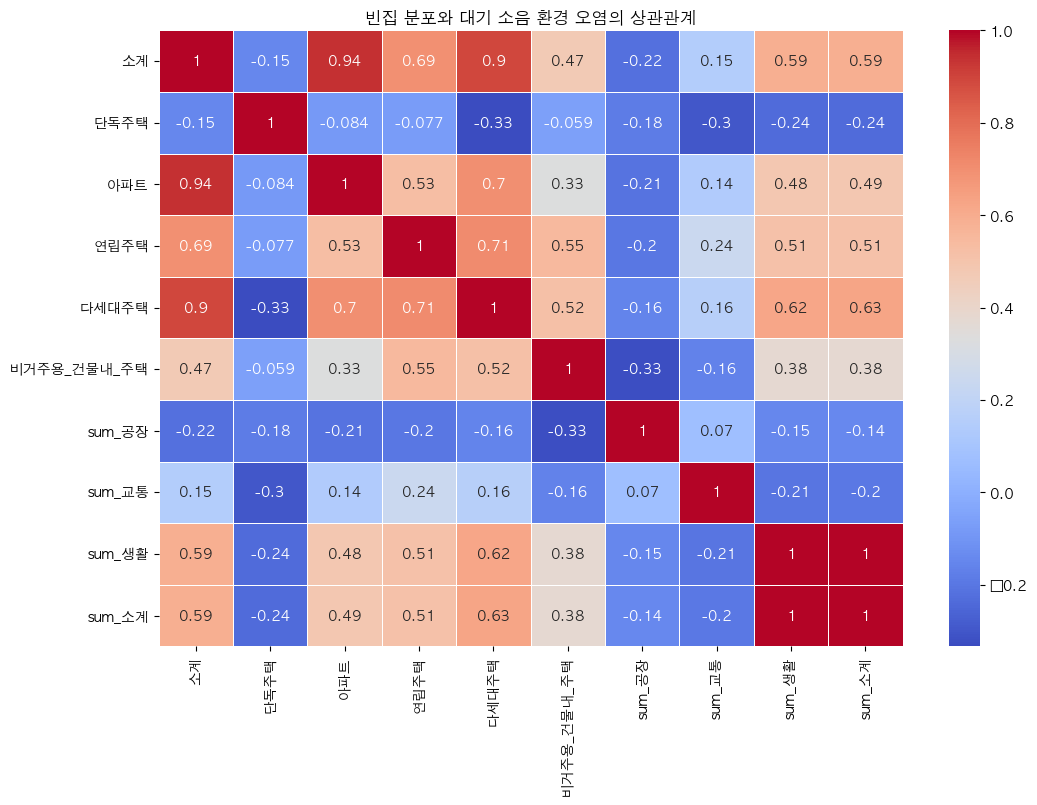

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

# 임계값 설정
threshold = 0.8

# 임계값을 초과하는 상관관계 쌍 추출
high_corr = correlation_matrix[abs(correlation_matrix) > threshold].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 상관관계가 높은 컬럼 출력
print(high_corr)

# 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('빈집 분포와 대기 소음 환경 오염의 상관관계')
plt.show()

In [163]:
df_house = df_house.drop(columns=['Gu'])
df_noise = df_noise.drop(columns=['Gu'])

In [164]:
# 빈집 관련 컬럼들
housing_columns = df_house.columns

# 대기오염 관련 컬럼들
noise_columns = df_noise.columns

# 빈집과 대기오염 변수 간의 상관관계만 추출
correlation_housing_pollution = correlation_matrix.loc[housing_columns, noise_columns]

# 절대값 기준으로 상위 5개 상관관계 추출
top_5_correlations = correlation_housing_pollution.unstack().abs().sort_values(ascending=False).head(5)

# 상위 5개 상관관계 출력
print(top_5_correlations)

sum_소계  다세대주택    0.626241
sum_생활  다세대주택    0.624295
sum_소계  소계       0.591756
sum_생활  소계       0.590217
sum_소계  연립주택     0.512863
dtype: float64


In [153]:
df_house = pd.read_csv('./전체_서울시_빈집_현황.csv')
df_pollution = pd.read_csv('./전체_환경오염물질_배출시설.csv')

In [126]:
df_house.rename(columns={'gu': 'Gu'}, inplace=True)

In [127]:
emp_pollution = pd.merge(df_house, df_pollution, on='Gu', how='inner')
emp_pollution.head()

,Gu,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,sum_대기(가스·먼지·매연및악취) 1종,sum_대기(가스·먼지·매연및악취) 2종,sum_대기(가스·먼지·매연및악취) 3종,sum_대기(가스·먼지·매연및악취) 4종,sum_대기(가스·먼지·매연및악취) 5종,sum_대기(가스·먼지·매연및악취) 소계,sum_수질(폐수) 1종,sum_수질(폐수) 2종,sum_수질(폐수) 3종,sum_수질(폐수) 4종,sum_수질(폐수) 5종,sum_수질(폐수) 소계
0,강남구,35440,29,17630,1892,15571,318,10.0,5.0,6.0,199.0,438.0,658.0,0.0,5.0,16.0,16.0,501.0,538.0
1,강동구,15266,30,9985,387,4737,127,0.0,3.0,5.0,51.0,52.0,111.0,3.0,0.0,9.0,12.0,276.0,300.0
2,강북구,7281,423,2691,486,3576,105,0.0,0.0,0.0,18.0,60.0,78.0,0.0,0.0,2.0,0.0,167.0,169.0
3,강서구,24010,138,12422,859,10345,246,3.0,5.0,1.0,109.0,337.0,455.0,4.0,2.0,20.0,36.0,549.0,611.0
4,관악구,3086,527,1405,188,925,41,0.0,3.0,0.0,24.0,67.0,94.0,0.0,0.0,6.0,5.0,136.0,147.0


In [128]:

# 특정 문자열 제거 함수 정의
def remove_specific_string_from_column_names(column_name, string_to_remove):
    return column_name.replace(string_to_remove, '')

# 열 이름에서 특정 문자열 제거
string_to_remove = '(가스·먼지·매연및악취)'
new_columns = {col: remove_specific_string_from_column_names(col, string_to_remove) for col in emp_pollution.columns}

emp_pollution.rename(columns=new_columns, inplace=True)

emp_pollution.columns


Index(['Gu', '소계', '단독주택', '아파트', '연립주택', '다세대주택', '비거주용_건물내_주택', 'sum_대기 1종',
       'sum_대기 2종', 'sum_대기 3종', 'sum_대기 4종', 'sum_대기 5종', 'sum_대기 소계',
       'sum_수질(폐수) 1종', 'sum_수질(폐수) 2종', 'sum_수질(폐수) 3종', 'sum_수질(폐수) 4종',
       'sum_수질(폐수) 5종', 'sum_수질(폐수) 소계'],
      dtype='object')

In [129]:
# 열 이름에서 특정 문자열 제거
string_to_remove = '(폐수)'
new_columns = {col: remove_specific_string_from_column_names(col, string_to_remove) for col in emp_pollution.columns}

emp_pollution.rename(columns=new_columns, inplace=True)

emp_pollution.columns

Index(['Gu', '소계', '단독주택', '아파트', '연립주택', '다세대주택', '비거주용_건물내_주택', 'sum_대기 1종',
       'sum_대기 2종', 'sum_대기 3종', 'sum_대기 4종', 'sum_대기 5종', 'sum_대기 소계',
       'sum_수질 1종', 'sum_수질 2종', 'sum_수질 3종', 'sum_수질 4종', 'sum_수질 5종',
       'sum_수질 소계'],
      dtype='object')

In [130]:
# 숫자형 열만 선택하여 상관관계 분석
numeric_df = emp_pollution.select_dtypes(include=['float64', 'int64'])
# 상관관계 분석
correlation_matrix = numeric_df.corr()
correlation_matrix

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,sum_대기 1종,sum_대기 2종,sum_대기 3종,sum_대기 4종,sum_대기 5종,sum_대기 소계,sum_수질 1종,sum_수질 2종,sum_수질 3종,sum_수질 4종,sum_수질 5종,sum_수질 소계
소계,1.000000,-0.148471,0.939789,0.694711,0.895547,0.470382,0.592942,0.533305,0.340369,0.360139,0.256742,0.315357,-0.032724,0.448756,0.671458,0.246675,0.182789,0.205353
단독주택,-0.148471,1.000000,-0.084474,-0.077029,-0.333685,-0.058721,-0.130285,-0.260783,-0.002035,-0.103202,-0.197696,-0.182882,-0.097096,-0.268520,0.003095,-0.201579,-0.134870,-0.140940
아파트,0.939789,-0.084474,1.000000,0.528086,0.699773,0.329598,0.506828,0.462983,0.480383,0.365239,0.249269,0.310485,0.038535,0.356353,0.644114,0.294450,0.203033,0.225910
연립주택,0.694711,-0.077029,0.528086,1.000000,0.712260,0.548783,0.254903,0.366734,0.191033,0.279458,0.146196,0.200529,-0.282666,0.257691,0.475328,0.045046,0.037413,0.048939
다세대주택,0.895547,-0.333685,0.699773,0.712260,1.000000,0.520544,0.617228,0.551849,0.089887,0.280901,0.238120,0.276534,-0.074604,0.523345,0.570921,0.174637,0.140502,0.159575
비거주용_건물내_주택,0.470382,-0.058721,0.329598,0.548783,0.520544,1.000000,0.482350,0.232875,0.320894,0.545599,0.357718,0.439517,-0.017383,0.083195,0.274885,0.157853,0.382491,0.385141
sum_대기 1종,0.592942,-0.130285,0.506828,0.254903,0.617228,0.482350,1.000000,0.125739,0.064950,0.088480,0.120023,0.133402,-0.140566,0.283279,0.227993,0.104312,-0.032398,-0.021657
sum_대기 2종,0.533305,-0.260783,0.462983,0.366734,0.551849,0.232875,0.125739,1.000000,0.119030,0.300279,0.323274,0.343326,0.189760,0.660236,0.446048,0.077079,0.342412,0.353157
sum_대기 3종,0.340369,-0.002035,0.480383,0.191033,0.089887,0.320894,0.064950,0.119030,1.000000,0.669561,0.449071,0.542696,0.144242,0.061595,0.276537,0.303578,0.535933,0.540738
sum_대기 4종,0.360139,-0.103202,0.365239,0.279458,0.280901,0.545599,0.088480,0.300279,0.669561,1.000000,0.767739,0.876246,0.207684,0.281020,0.406893,0.280361,0.841411,0.842896


     Feature1   Feature2  Correlation
1          소계        아파트     0.939789
2          소계      다세대주택     0.895547
4         아파트         소계     0.939789
7       다세대주택         소계     0.895547
14  sum_대기 4종  sum_대기 소계     0.876246
15  sum_대기 4종  sum_수질 5종     0.841411
16  sum_대기 4종  sum_수질 소계     0.842896
18  sum_대기 5종  sum_대기 소계     0.981204
19  sum_대기 5종  sum_수질 5종     0.870338
20  sum_대기 5종  sum_수질 소계     0.875542
21  sum_대기 소계  sum_대기 4종     0.876246
22  sum_대기 소계  sum_대기 5종     0.981204
24  sum_대기 소계  sum_수질 5종     0.904210
25  sum_대기 소계  sum_수질 소계     0.908872
30  sum_수질 5종  sum_대기 4종     0.841411
31  sum_수질 5종  sum_대기 5종     0.870338
32  sum_수질 5종  sum_대기 소계     0.904210
34  sum_수질 5종  sum_수질 소계     0.998844
35  sum_수질 소계  sum_대기 4종     0.842896
36  sum_수질 소계  sum_대기 5종     0.875542
37  sum_수질 소계  sum_대기 소계     0.908872
38  sum_수질 소계  sum_수질 5종     0.998844


/usr/local/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


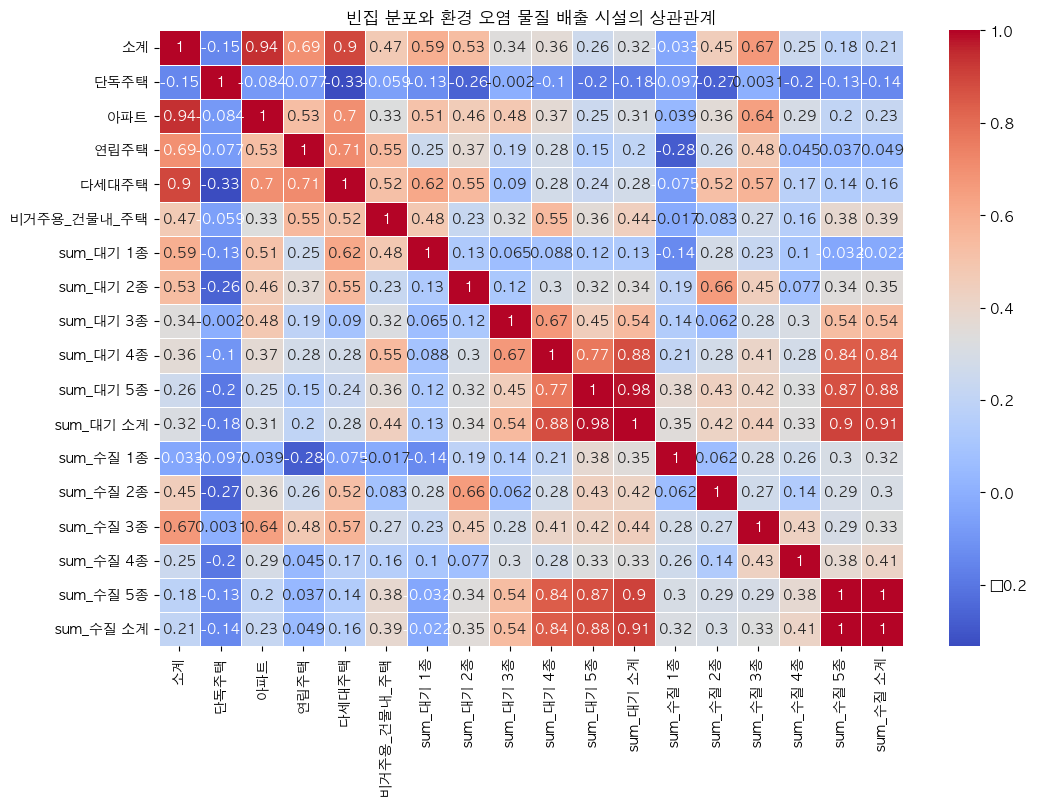

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

# 임계값 설정
threshold = 0.8

# 임계값을 초과하는 상관관계 쌍 추출
high_corr = correlation_matrix[abs(correlation_matrix) > threshold].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 상관관계가 높은 컬럼 출력
print(high_corr)

# 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('빈집 분포와 환경 오염 물질 배출 시설의 상관관계')
plt.show()

In [134]:
df_house = df_house.drop(columns=['Gu'])
emp_pollution = df_pollution.drop(columns=['Gu'])


In [139]:

# 특정 문자열 제거 함수 정의
def remove_specific_string_from_column_names(column_name, string_to_remove):
    return column_name.replace(string_to_remove, '')

# 열 이름에서 특정 문자열 제거
string_to_remove = '(가스·먼지·매연및악취)'
new_columns = {col: remove_specific_string_from_column_names(col, string_to_remove) for col in emp_pollution.columns}

emp_pollution.rename(columns=new_columns, inplace=True)

emp_pollution.columns


Index(['sum_대기 1종', 'sum_대기 2종', 'sum_대기 3종', 'sum_대기 4종', 'sum_대기 5종',
       'sum_대기 소계', 'sum_수질(폐수) 1종', 'sum_수질(폐수) 2종', 'sum_수질(폐수) 3종',
       'sum_수질(폐수) 4종', 'sum_수질(폐수) 5종', 'sum_수질(폐수) 소계'],
      dtype='object')

In [140]:
# 열 이름에서 특정 문자열 제거
string_to_remove = '(폐수)'
new_columns = {col: remove_specific_string_from_column_names(col, string_to_remove) for col in emp_pollution.columns}

emp_pollution.rename(columns=new_columns, inplace=True)

emp_pollution.columns

Index(['sum_대기 1종', 'sum_대기 2종', 'sum_대기 3종', 'sum_대기 4종', 'sum_대기 5종',
       'sum_대기 소계', 'sum_수질 1종', 'sum_수질 2종', 'sum_수질 3종', 'sum_수질 4종',
       'sum_수질 5종', 'sum_수질 소계'],
      dtype='object')

In [141]:
emp_pollution

,sum_대기 1종,sum_대기 2종,sum_대기 3종,sum_대기 4종,sum_대기 5종,sum_대기 소계,sum_수질 1종,sum_수질 2종,sum_수질 3종,sum_수질 4종,sum_수질 5종,sum_수질 소계
0,10.0,5.0,6.0,199.0,438.0,658.0,0.0,5.0,16.0,16.0,501.0,538.0
1,0.0,3.0,5.0,51.0,52.0,111.0,3.0,0.0,9.0,12.0,276.0,300.0
2,0.0,0.0,0.0,18.0,60.0,78.0,0.0,0.0,2.0,0.0,167.0,169.0
3,3.0,5.0,1.0,109.0,337.0,455.0,4.0,2.0,20.0,36.0,549.0,611.0
4,0.0,3.0,0.0,24.0,67.0,94.0,0.0,0.0,6.0,5.0,136.0,147.0
5,0.0,0.0,0.0,53.0,52.0,105.0,3.0,0.0,0.0,13.0,119.0,135.0
6,0.0,3.0,3.0,74.0,279.0,359.0,0.0,2.0,4.0,9.0,384.0,399.0
7,0.0,0.0,0.0,62.0,411.0,473.0,0.0,2.0,8.0,20.0,458.0,488.0
8,6.0,0.0,5.0,59.0,84.0,154.0,0.0,0.0,5.0,19.0,254.0,278.0
9,0.0,0.0,1.0,50.0,70.0,121.0,0.0,0.0,0.0,6.0,231.0,237.0


In [142]:
# 빈집 관련 컬럼들
housing_columns = df_house.columns

# 대기오염 관련 컬럼들
pollution_columns = emp_pollution.columns

# 빈집과 대기오염 변수 간의 상관관계만 추출
correlation_housing_pollution = correlation_matrix.loc[housing_columns, pollution_columns]

# 절대값 기준으로 상위 5개 상관관계 추출
top_5_correlations = correlation_housing_pollution.unstack().abs().sort_values(ascending=False).head(5)

# 상위 5개 상관관계 출력
print(top_5_correlations)

sum_수질 3종  소계       0.671458
           아파트      0.644114
sum_대기 1종  다세대주택    0.617228
           소계       0.592942
sum_수질 3종  다세대주택    0.570921
dtype: float64
